In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
coasters1 = pd.read_csv('roller_coasters.csv')
coasters = coasters1.dropna()
higher = coasters.sort_values('height', ascending = False).reset_index()
higher = higher[:51]
del higher['index']
faster = coasters.sort_values('speed', ascending = False).reset_index()
faster = faster[:51]
del faster['index']
longer = coasters.sort_values('length', ascending = False).reset_index()
longer = longer[:51]
del longer['index']


     seating_type  num
0   4th Dimension   16
1          Alpine    2
2       Bobsleigh    9
3       Floorless   22
4          Flying   23
5        Inverted  104
6       Motorbike   11
7        Pipeline    3
8        Sit Down  965
9        Spinning   54
10       Stand Up   16
11      Suspended   26
12  Water Coaster   16
13           Wing   12


([<matplotlib.patches.Wedge at 0x1f5506f7850>,
 [Text(1.0991506133565792, 0.043219546016308605, '4th Dimension'),
  Text(1.0961662237432426, 0.09175843244345273, 'Alpine'),
  Text(1.0932871928243975, 0.1213388396439864, 'Bobsleigh'),
  Text(1.080888844557775, 0.2041551020928907, 'Floorless'),
  Text(1.051772716549101, 0.32213995828354525, 'Flying'),
  Text(0.9021421530646611, 0.6293961675001349, 'Inverted'),
  Text(0.6909567605708788, 0.8559081463693388, 'Motorbike'),
  Text(0.6611210619751863, 0.879158086701591, 'Pipeline'),
  Text(-1.0855769343073332, -0.17754638745942458, 'Sit Down'),
  Text(0.9774561783715343, -0.504558638181248, 'Spinning'),
  Text(1.0493703385667226, -0.3298816341301255, 'Stand Up'),
  Text(1.0777627632898235, -0.2200623231402504, 'Suspended'),
  Text(1.0946949082533324, -0.10790300201675847, 'Water Coaster'),
  Text(1.0995221895978904, -0.032418429663708524, 'Wing')],
 [Text(0.5995366981944977, 0.023574297827077418, '1.3%'),
  Text(0.5979088493144958, 0.05005005

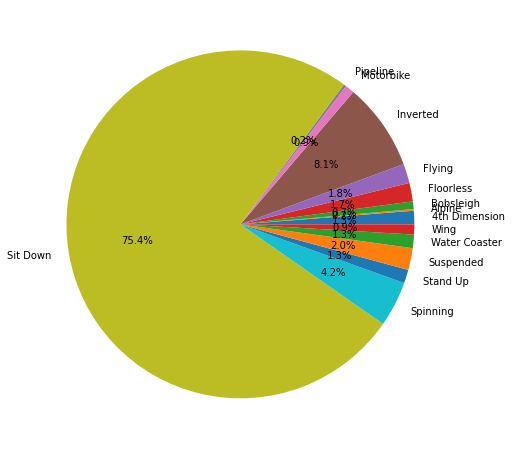

In [36]:
#seating types

seats = coasters.groupby('seating_type').size().dropna().reset_index()
seats.columns = ['seating_type', 'num']
print(seats)
plt.figure(figsize = (14, 8))
plt.pie(seats['num'], autopct = '%0.1f%%', labels = seats['seating_type'])




In [48]:
print(faster.head())

                  name material_type seating_type  speed  height  length  \
0        Formula Rossa         Steel     Sit Down  240.0    52.0  2000.0   
1            Kingda Ka         Steel     Sit Down  206.0   139.0   950.0   
2  Top Thrill Dragster         Steel     Sit Down  192.0   128.0   853.0   
3            Red Force         Steel     Sit Down  185.0   112.0   880.0   
4           Do-Dodonpa         Steel     Sit Down  172.0    52.0  1189.0   

   num_inversions manufacturer                       park            status  
0             0.0      Intamin              Ferrari World  status.operating  
1             0.0      Intamin  Six Flags Great Adventure  status.operating  
2             0.0      Intamin                Cedar Point  status.operating  
3             0.0      Intamin               Ferrari Land  status.operating  
4             0.0          S&S            Fuji-Q Highland  status.operating  


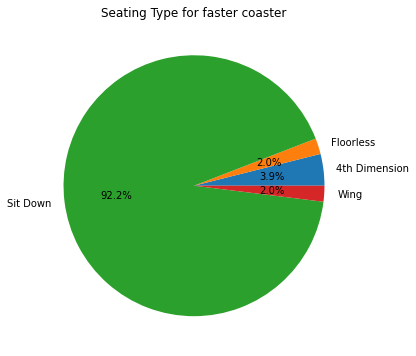

In [54]:


def what_seat (name, df):
    total_seats = df.groupby('seating_type').size().reset_index()
    total_seats.columns = ['type', 'num']
    plt.figure(figsize = (10,6))
    plt.pie(total_seats['num'], autopct = '%0.1f%%', labels = total_seats['type'])
    plt.title('Seating Type for ' + name + " coaster")
what_seat('faster', faster)
      
    

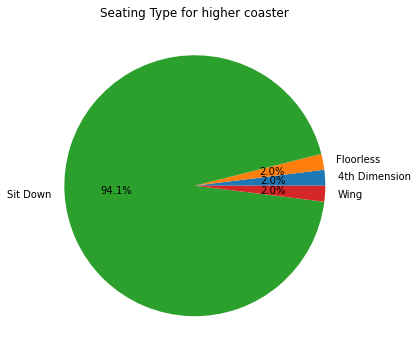

In [55]:
what_seat('higher', higher)

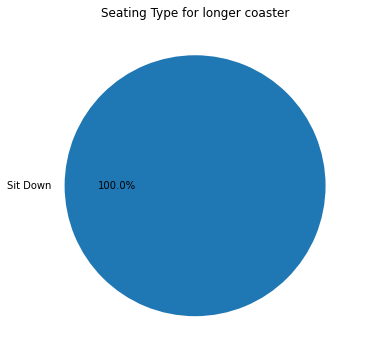

In [56]:
what_seat ('longer', longer)

average_speed = man.groupby('manufacturer').size().mean().sort_values('speed', ascending = False)
print(average_speed)


In [82]:
man = coasters[['manufacturer', 'speed', 'height', 'num_inversions', 'seating_type']].dropna().reset_index()
del man['index']
print(man)

                       manufacturer  speed  height  num_inversions  \
0                            Vekoma   75.0    37.0             7.0   
1                            Vekoma   45.0    25.0             0.0   
2                          Zamperla   30.0     8.0             0.0   
3                   William J. Cobb   85.0    35.0             0.0   
4                            Soquet   55.0    17.0             0.0   
...                             ...    ...     ...             ...   
1274                    L&T Systems   40.0    15.0             0.0   
1275  Philadelphia Toboggan Coaster   80.0    21.0             0.0   
1276                            S&S   90.0    33.0             0.0   
1277                            SBF   30.0     7.0             0.0   
1278                           Mack   80.0    30.0             0.0   

     seating_type  
0        Sit Down  
1       Suspended  
2        Sit Down  
3        Sit Down  
4        Sit Down  
...           ...  
1274     Sit Down  

In [96]:
sits = man.groupby(['manufacturer', 'seating_type']).size().reset_index()
sits.columns = ['manufacturer', 'seats', 'num']
sits_pivot = sits.pivot(index='seats', columns = 'manufacturer', values = 'num').fillna(0)
sits_pivot.to_csv('sits.csv')